# Penyeimbangan Data

## 1. Download dataset ecoli dari UCI https://archive.ics.uci.edu/dataset/39/ecoli



## 2. Simpan didatabase MySQL

berikut adalah tabel dataset:
![Tabel Iris di PostgreSQL](_build/html/_static/images/ecoli.png)

## 2.1 Import library

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler
from collections import Counter
import seaborn as sns

## 2.2 load dataset dari MYSQL menggunakan sqlalchemy

In [11]:
engine = create_engine("mysql+pymysql://root:@localhost/ecoli")
df = pd.read_sql("SELECT * FROM ecoli;", engine) 

## Distribusi Kelas

DATA AWAL ECOLI DATASET
Jumlah data: 336
Jumlah fitur: 7
Jumlah kelas: 8


Preview data (5 baris pertama):
         name   mcg   gvh   lip  chg   aac  alm1  alm2 class
0   AAT_ECOLI  0.49  0.29  0.48  0.5  0.56  0.24  0.35    cp
1  ACEA_ECOLI  0.07  0.40  0.48  0.5  0.54  0.35  0.44    cp
2  ACEK_ECOLI  0.56  0.40  0.48  0.5  0.49  0.37  0.46    cp
3  ACKA_ECOLI  0.59  0.49  0.48  0.5  0.52  0.45  0.36    cp
4   ADI_ECOLI  0.23  0.32  0.48  0.5  0.55  0.25  0.35    cp


Statistik deskriptif data:
              mcg         gvh         lip         chg         aac        alm1  \
count  336.000000  336.000000  336.000000  336.000000  336.000000  336.000000   
mean     0.500060    0.500000    0.495476    0.501488    0.500030    0.500179   
std      0.194634    0.148157    0.088495    0.027277    0.122376    0.215751   
min      0.000000    0.160000    0.480000    0.500000    0.000000    0.030000   
25%      0.340000    0.400000    0.480000    0.500000    0.420000    0.330000   
50%      0.5

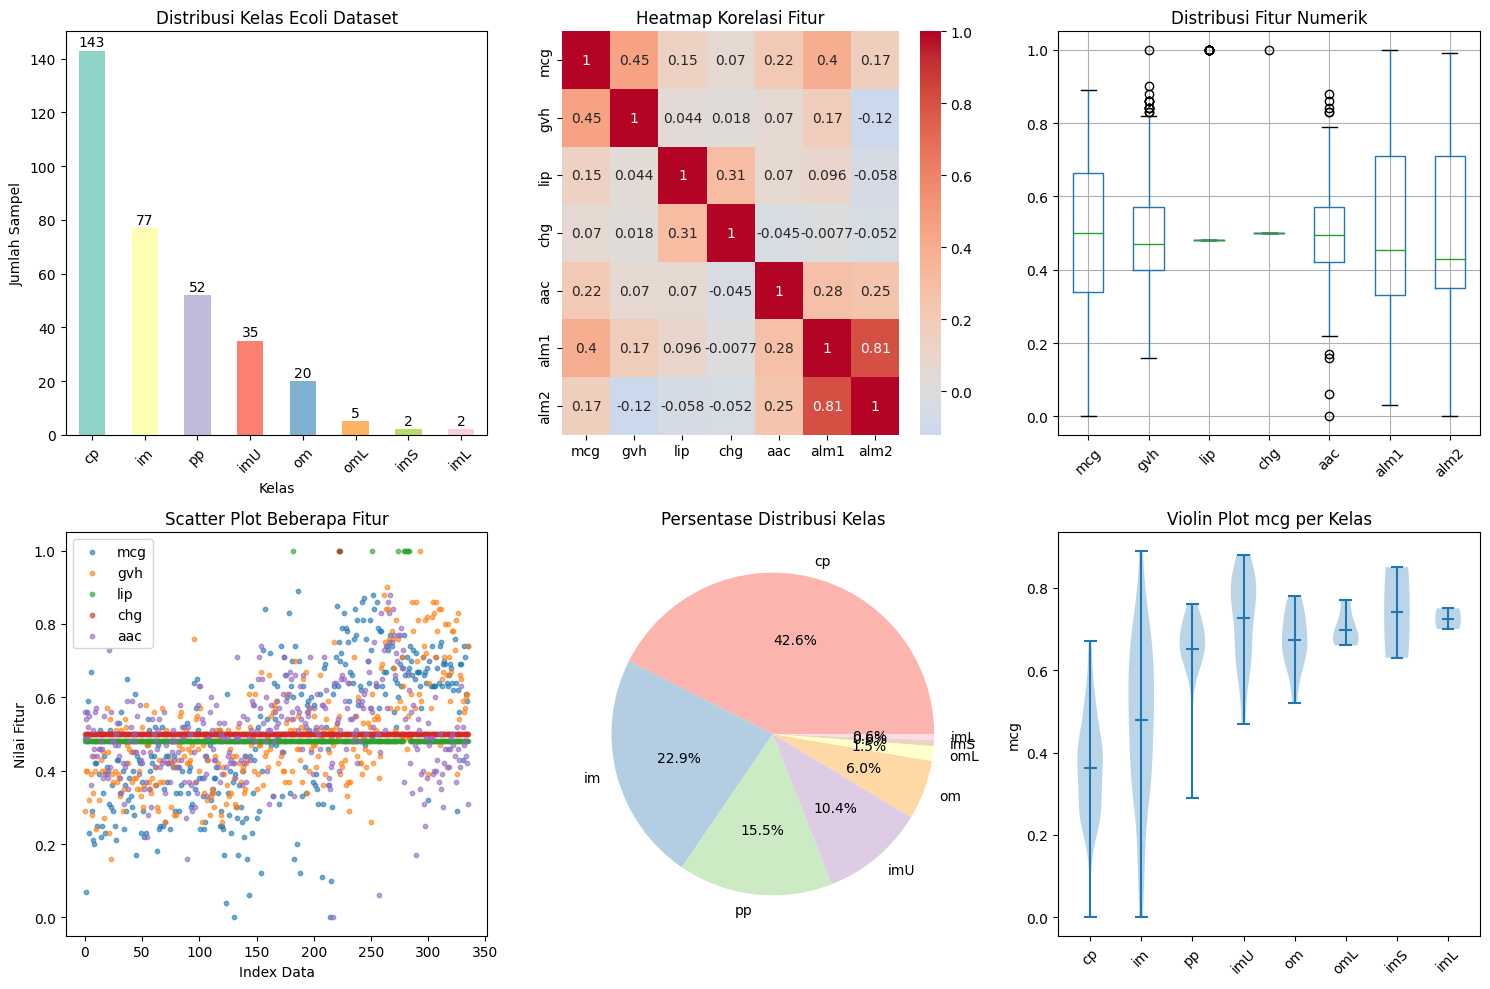

In [12]:
# 2. Tampilkan data awal dalam bentuk tabel
print("=" * 60)
print("DATA AWAL ECOLI DATASET")
print("=" * 60)
print(f"Jumlah data: {len(df)}")
print(f"Jumlah fitur: {len(df.columns) - 2}")  # excluding name and class
print(f"Jumlah kelas: {df['class'].nunique()}")
print("\n")

# Tampilkan preview data
print("Preview data (5 baris pertama):")
print(df.head())
print("\n")

# Tampilkan informasi statistik
print("Statistik deskriptif data:")
print(df.drop(columns=['name', 'class']).describe())
print("\n")

# Tampilkan distribusi kelas
print("Distribusi kelas:")
class_distribution = df['class'].value_counts()
print(class_distribution)
print("\n")

# 3. Visualisasi data awal
plt.figure(figsize=(15, 10))

# Subplot 1: Distribusi kelas (Bar plot)
plt.subplot(2, 3, 1)
class_distribution.plot(kind='bar', color=plt.cm.Set3(np.arange(len(class_distribution))))
plt.title('Distribusi Kelas Ecoli Dataset')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=45)
for i, v in enumerate(class_distribution):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')

# Subplot 2: Heatmap korelasi
plt.subplot(2, 3, 2)
numeric_df = df.drop(columns=['name', 'class'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap Korelasi Fitur')

# Subplot 3: Boxplot untuk melihat distribusi fitur
plt.subplot(2, 3, 3)
numeric_df.boxplot()
plt.title('Distribusi Fitur Numerik')
plt.xticks(rotation=45)

# Subplot 4: Pairplot untuk beberapa fitur (maks 5 fitur agar tidak terlalu padat)
plt.subplot(2, 3, 4)
if len(numeric_df.columns) > 5:
    sample_features = numeric_df.columns[:5]  # Ambil 5 fitur pertama
else:
    sample_features = numeric_df.columns
    
for i, feature in enumerate(sample_features):
    plt.scatter(range(len(df)), df[feature], alpha=0.6, label=feature, s=10)
plt.title('Scatter Plot Beberapa Fitur')
plt.xlabel('Index Data')
plt.ylabel('Nilai Fitur')
plt.legend()

# Subplot 5: Pie chart distribusi kelas
plt.subplot(2, 3, 5)
plt.pie(class_distribution.values, labels=class_distribution.index, 
        autopct='%1.1f%%', colors=plt.cm.Pastel1(np.arange(len(class_distribution))))
plt.title('Persentase Distribusi Kelas')

# Subplot 6: Violin plot untuk satu fitur contoh
plt.subplot(2, 3, 6)
if len(numeric_df.columns) > 0:
    sample_feature = numeric_df.columns[0]
    data_to_plot = [df[df['class'] == cls][sample_feature] for cls in class_distribution.index]
    plt.violinplot(data_to_plot, showmeans=True)
    plt.xticks(range(1, len(class_distribution) + 1), class_distribution.index, rotation=45)
    plt.title(f'Violin Plot {sample_feature} per Kelas')
    plt.ylabel(sample_feature)

plt.tight_layout()
plt.show()

## 3. Tampilkan data dalam scatter plot  menggunakan PCA. PCA mentransformasi data menjadi dimensi rendah (2)

3. Pisahkan fitur dan label

In [13]:
X = df.drop(columns=["name", "class"])
y = df["class"]

4. Transform data dan tampilkan scatter plot menggunakan PCA

Explained variance ratio (PC1, PC2): [0.31508933 0.20874152]


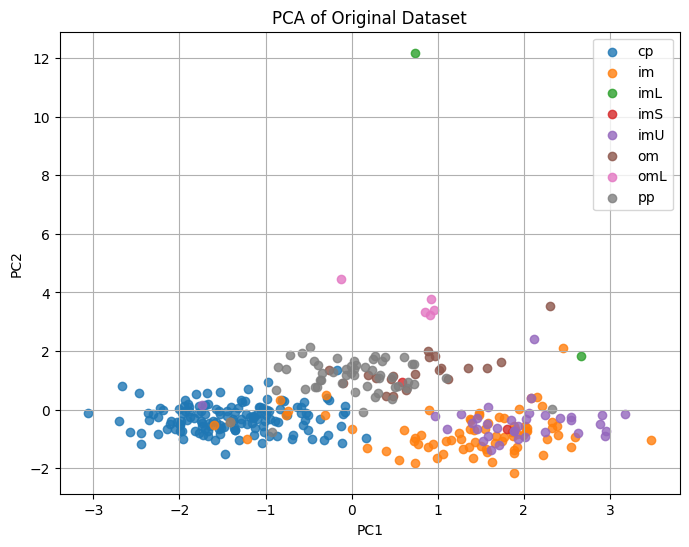

In [14]:
# 1. Normalisasi
X_scaled = StandardScaler().fit_transform(X)

# 2. PCA (2 komponen)
pca = PCA(n_components=2)
X_r = pca.fit_transform(X_scaled)

# 3. Tampilkan explained variance
print("Explained variance ratio (PC1, PC2):", pca.explained_variance_ratio_)

# 4. Plot hasil PCA
plt.figure(figsize=(8,6))
for target_name in np.unique(y):
    plt.scatter(
        X_r[y == target_name, 0], 
        X_r[y == target_name, 1], 
        alpha=0.8, 
        label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of Original Dataset")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.show()

## 4. Lakukan penyeimbangan data menggunakan ADASYN


In [15]:
try:
    adasyn = ADASYN(n_neighbors=1, random_state=42)
    X_resampled, y_resampled = adasyn.fit_resample(X_scaled, y_encoded)
    print("✅ ADASYN berhasil")

except Exception as e:
    print("⚠️ ADASYN gagal:", e)

⚠️ ADASYN gagal: name 'y_encoded' is not defined


### Menggunakan SMOTE

In [16]:
smote = SMOTE(k_neighbors=1, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("✅ SMOTE berhasil")

✅ SMOTE berhasil


In [17]:
# y_resampled_decoded = le.inverse_transform(y_resampled)
print("Sesudah:", Counter(y_resampled))

Sesudah: Counter({'cp': 143, 'im': 143, 'imS': 143, 'imL': 143, 'imU': 143, 'om': 143, 'omL': 143, 'pp': 143})


## 5. Ploting data dari data yang diimbangkan menggunakan PCA, tandai data data hasil generatenya

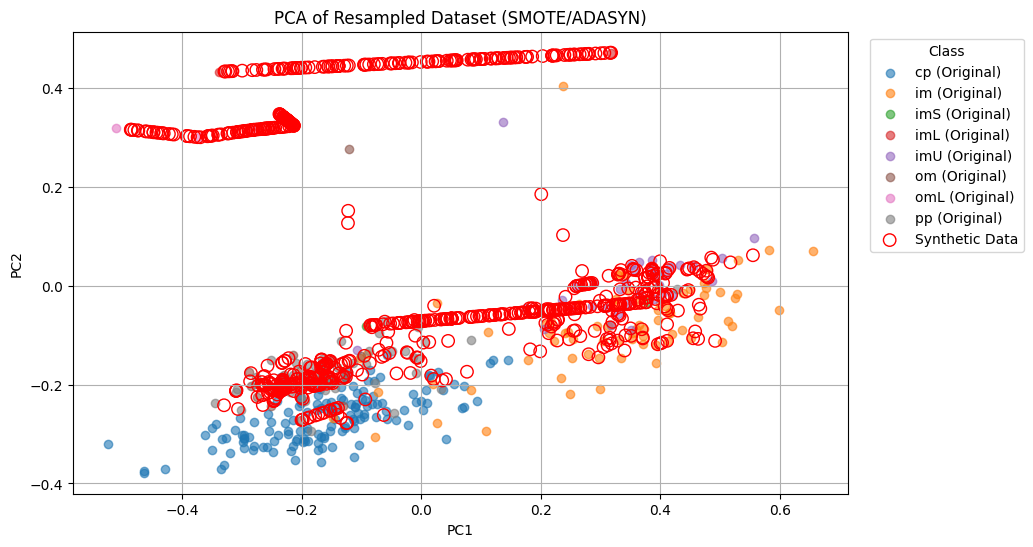

In [18]:
# --- 1. PCA (2 komponen) ---
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_resampled)

# --- 2. Buat DataFrame hasil PCA ---
data_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
data_pca['Class'] = y_resampled

# Tandai data asli vs synthetic
n_original = len(X_scaled)   # jumlah data sebelum SMOTE
data_pca['Type'] = ["Original"] * n_original + ["Synthetic"] * (len(data_pca) - n_original)

# --- 3. Plot hasil PCA ---
plt.figure(figsize=(10,6))

# Plot data asli per kelas
for label in data_pca['Class'].unique():
    subset = data_pca[(data_pca['Class'] == label) & (data_pca['Type'] == "Original")]
    plt.scatter(
        subset['PC1'], subset['PC2'],
        label=f"{label} (Original)", alpha=0.6
    )

# Plot data synthetic dengan marker khusus
synthetic = data_pca[data_pca['Type'] == "Synthetic"]
plt.scatter(
    synthetic['PC1'], synthetic['PC2'],
    facecolors='none', edgecolors='red', marker='o', s=80, label="Synthetic Data"
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of Resampled Dataset (SMOTE/ADASYN)")
plt.legend(title="Class", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid()
plt.show()
